**Discrepancies in Gene Expression between MERSCOPE brain1 (animal 609882) and brain3 (animal 638850)**

This notebook is meant to serve as a central repository for any discrepancies we uncover between brain1 and brain3 gene expression and/or cell type mapping

In [27]:
import numpy as np
import pathlib
import anndata as ad
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Load anndata

In [1]:
# Load brain1 + brain3 combined adata
adata = ad.read_h5ad('/root/capsule/data/merfish_609882and638850_AIT17_annotated_TH_ZI_only_shared_genes_only_2023-04-07_00-00-00/Brain_1_3_TH_ZI.h5ad')

NameError: name 'ad' is not defined

In [4]:
adata.X

<606012x276 sparse matrix of type '<class 'numpy.float64'>'
	with 35821859 stored elements in Compressed Sparse Row format>

# Plotting Functions

## plot_brain1_vs_brain3_expression()

In [125]:
from scipy import sparse

def plot_brain1_vs_brain3_expression(ad, gene, section=None,
                                     **kwargs):
    """ Display the spatial expression of a requested list of genes a paired
    section of brain1 and brain3 """

    # Manual key of paired sections so that you only need to specify one 
    # section
    section_pairs_brain1_brain3 = np.array([['1198980071','1199651063'],
                                            ['1198980074','None'],
                                            ['1198980077','1199651060'],
                                            ['1198980080','None'],
                                            ['None',      '1199651057'],
                                            ['1198980086','None'],
                                            ['1198980089','1199651054'],
                                            ['1198980092','None'],
                                            ['1198980095','None'],
                                            ['1198980098','None'],
                                            ['1198980101','1199651048'],
                                            ['1198980105','None'],
                                            ['1198980108','1199651045'],
                                            ['1198980111','None'],
                                            ['1198980114','1199651042'],
                                            ['1198980117','None'],
                                            ['1198980120','1199651039'],
                                            ['1198980123','None'],
                                            ['None',      '1199651036'],
                                            ['1198980131','None'],
                                            ['1198980134','1199651033'],
                                            ['1198980137','None'],
                                            ['1198980140','None'],
                                            ['1198980146','1199651027'],
                                            ['1198980149','None'],
                                            ['1198980152','1199651024'],
                                            ['1198980155','None'],
                                            ['None',      '1199651021'],
                                            ['1198980161','None'],
                                            ['1198980164','1199651018'],
                                            ['None',      '1199651015']])

    #  Handle input to allow for multiple ways to specify the section to plot
    if section is None:
        # Default to ['1198980114','1199651042'] section pair
        pair_index = 14

    elif isinstance(section, str):
        # allow to specify by the section ID string
        sec_mask = ((section_pairs_brain1_brain3[:, 0]==section) | 
                    (section_pairs_brain1_brain3[:, 1]==section))
        if sum(sec_mask)==1:
            pair_index = np.where(sec_mask)[0][0]
        else:
            raise Exception('Unrecognized section ID')

    elif isinstance(section, int):
        # allow to specify by the AP order index of the sections
        if section in np.arange(len(section_pairs_brain1_brain3)):
            pair_index = section
        else:
            raise Exception('Unrecognized section index')
    else:
        raise Exception('Unrecognized section number. Must be a string of a brain1 or brain3 section ID or a numberical index')

    sec_names = section_pairs_brain1_brain3[pair_index]

    # obs masks for each brain's section
    sec_mask_brain1 = ad.obs.section==section_pairs_brain1_brain3[pair_index][0]
    sec_mask_brain3 = ad.obs.section==section_pairs_brain1_brain3[pair_index][1]

    # The transcript counts are stored in a sparse matrix, which cannot be
    # directly plotted w/out first: making dense, converting to an np.array,
    # and then flattening
    gene_exp_brain1 = np.array(sparse.csr_matrix.todense(adata[sec_mask_brain1][:,gene].X)).flatten()
    gene_exp_brain3 = np.array(sparse.csr_matrix.todense(adata[sec_mask_brain3][:,gene].X)).flatten()

    # Plot figure                           
    fig, axes = plt.subplots(1,2,figsize=(9,6))

    # Set some values for use in scatter()
    xaxis_shift_brain3 = 7000  # tighten up spatial_cirro spacing of two sections
    yaxis_shift_brain3 = 4700  # better alignment of the brain3 sections
    colormap = 'Blues' #'viridis'
    marker_size = 0.5

    # brain1
    ax = axes[0]
    sc = ax.scatter(adata[sec_mask_brain1].obsm["spatial_cirro"][:,0],
                    adata[sec_mask_brain1].obsm["spatial_cirro"][:,1], 
                    c=gene_exp_brain1, 
                    cmap=colormap, s=marker_size)
    ax.set_title('brain1', color='grey') # , (61000,-6400), ha='center', 
    cbar = plt.colorbar(sc, ax=ax, fraction=0.03, pad=0.04)
    cbar.set_label('log2(CPV+1)')
    # brain3
    ax = axes[1]
    sc = ax.scatter(adata[sec_mask_brain3].obsm["spatial_cirro"][:,0]+xaxis_shift_brain3,
                    adata[sec_mask_brain3].obsm["spatial_cirro"][:,1]+yaxis_shift_brain3, 
                    c=gene_exp_brain3, 
                    cmap=colormap, s=marker_size)
    ax.set_title('brain3', color='grey') # (68000,-6400), ha='center', 

    cbar = plt.colorbar(sc, ax=ax, fraction=0.03, pad=0.04)
    cbar.set_label('log2(CPV+1)')

    # formatting
    for ax in axes:
        ax.set_aspect('equal')
        ax.axis('off')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

    fig.suptitle(gene)
    fig.tight_layout()
    fig.subplots_adjust(top=1.3)

## Demonstrate plotting function

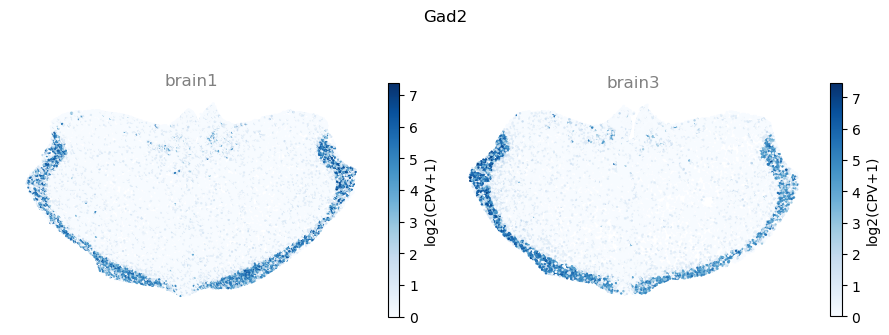

In [157]:
 plot_brain1_vs_brain3_expression(adata,'Gad2', section=10)

# Genes that are different